In [1]:
from PIL import Image
import urllib, cStringIO
import cv2
import numpy as np

In [2]:
def load_image(url):
    file = cStringIO.StringIO(urllib.urlopen(url).read())
    return Image.open(file)

In [3]:
obama = load_image("https://peopledotcom.files.wordpress.com/2016/08/michelle-obama-1024.jpg")

In [4]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

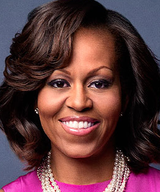

In [5]:
def detect_face(pil_image):
    cvimg = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(cvimg, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )
    faces = list(faces)
    faces.sort(key=lambda(x,y,w,h): w*h, reverse=True)
    if len(faces):
        return faces[0]
    else:
        return None

def crop_to_face(pil_image):
    target_size = (160, 192)
    face = detect_face(pil_image)
    if face is not None:
        center_x = face[0] + face[2] / 2
        center_y = face[1] + face[3] / 2
        width = int(round(face[2] / 0.65))
        height = width * target_size[1] / target_size[0]
        # height = min(pil_image.size[1], height)
        x = center_x - width/2
        y = center_y - height/2
        cropped = pil_image.crop((x, y, x + width, y + height))
        return cropped.resize(target_size, Image.ANTIALIAS)
    else:
        return pil_image

crop_to_face(obama)

In [20]:
# image_names = '000001.jpg 000002.jpg 000003.jpg 000004.jpg 000005.jpg 000006.jpg 000007.jpg 000008.jpg 000009.jpg 000010.jpg'.split()
# for fn in image_names:
#     image = Image.open('../data/celeba/img_align_celeba/' + fn)
#     face = detect_face(image)
#     if face is not None:
#         print face[2] * 1.0 / 160.0# image.size[0]
#     else:
#         print 'no face'

# faces should take up roughly 65% of the image horizontally

0.61875
0.68125
no face
no face
0.73125
0.60625
0.65
0.575
0.68125
0.61875
